In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Importing Dataset
dataset = pd.read_csv("diabetes.csv")
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset .describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

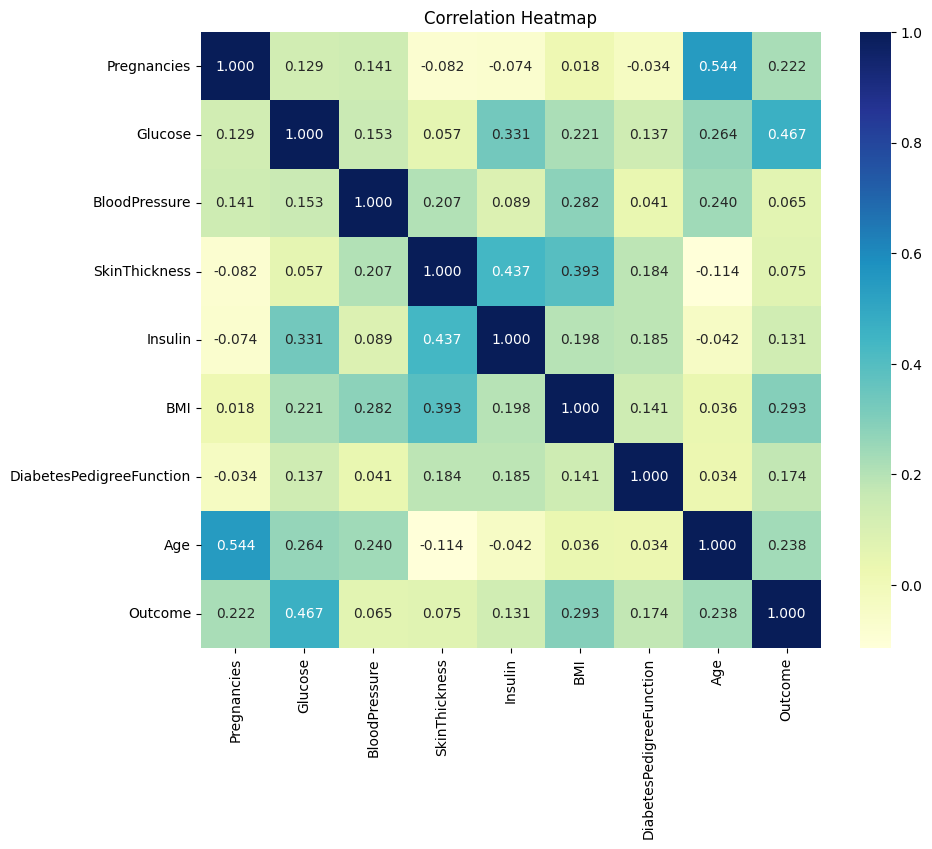

In [12]:
#Correlation plot of independent variables
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True, fmt=".3f", cmap = "YlGnBu")
plt.title("Correlation Heatmap")

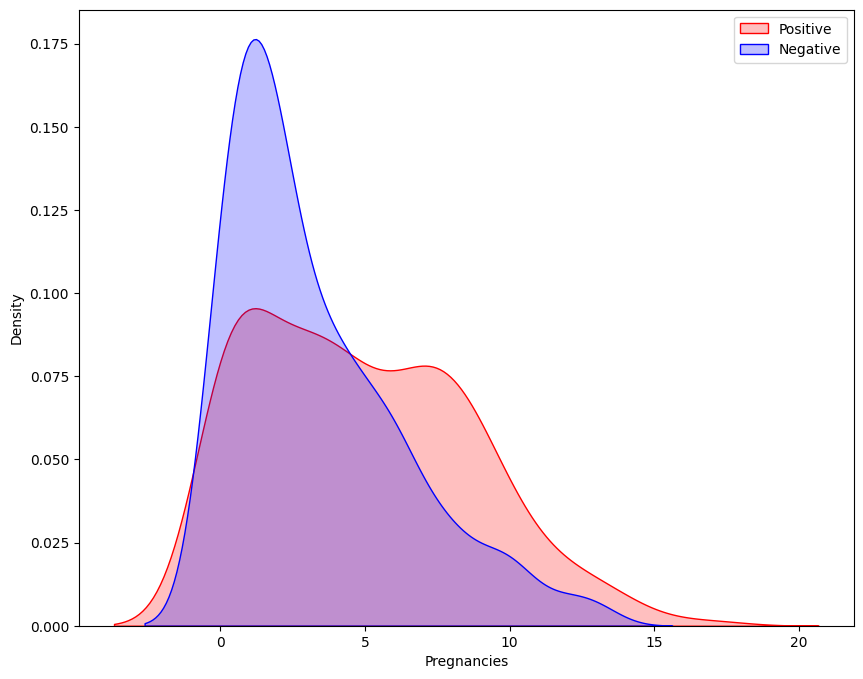

In [17]:
#Exploring Pregnancy and target variables
plt.figure(figsize =(10,8))
#Plotting Density function graph of the pregnancies and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

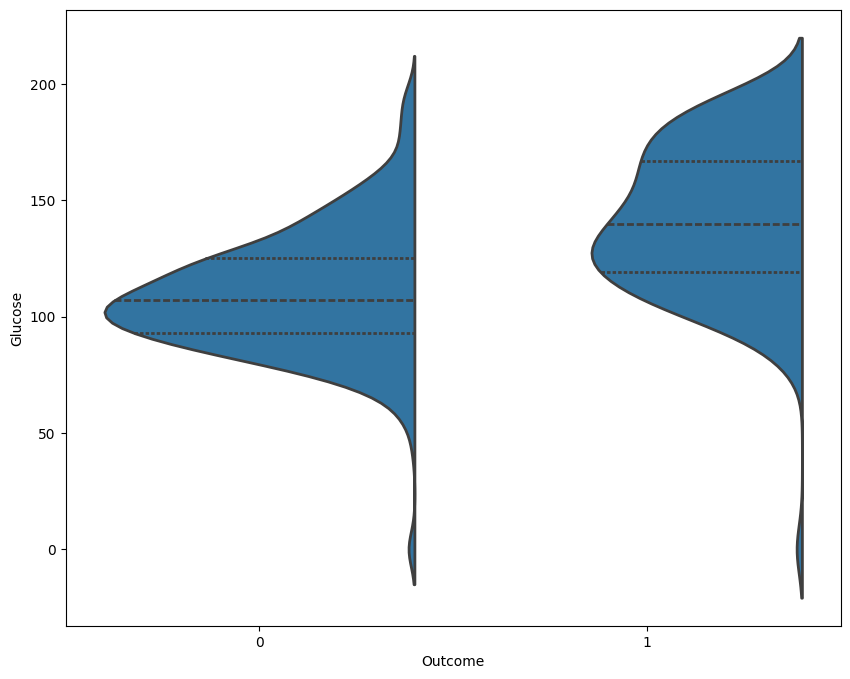

In [19]:
# Exploring glucose and target variables
plt.figure(figsize =(10,8))
sns.violinplot(data=dataset,x="Outcome", y="Glucose", split= True, linewidth=2, inner = "quart")


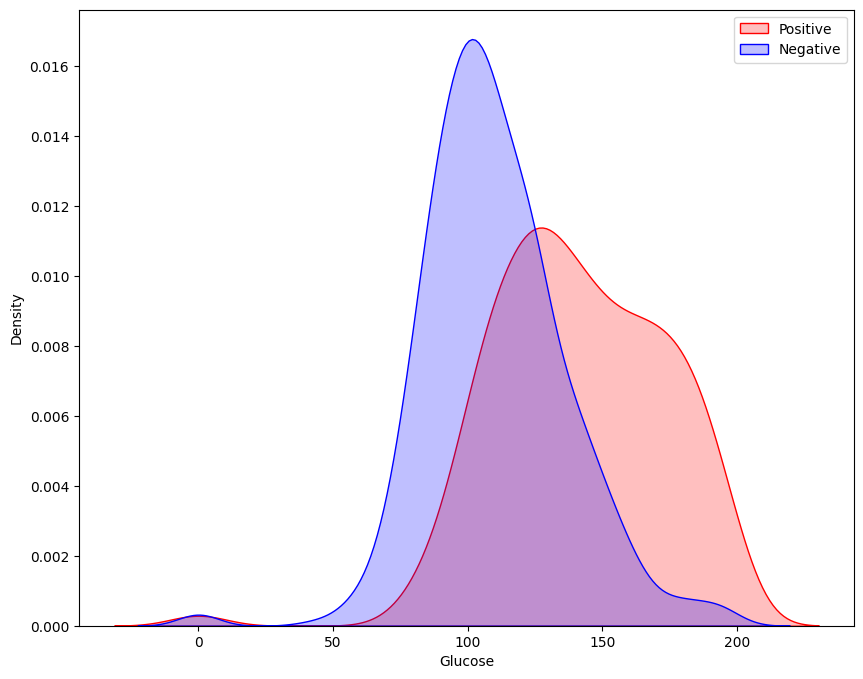

In [20]:
#Exploring Glucose and target variables
plt.figure(figsize =(10,8))
#Plotting Density function graph of the glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "blue", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

In [23]:
# Replace 0 values with the mean/median of the respective feature 
#Glucose
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())
#BloodPressure
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())
#BMI
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].median())
#SkinThickness
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].median())
#Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].median())

In [24]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [28]:
#Splitting the dependent and independent variable
X = dataset.drop(["Outcome"], axis = 1)
Y = dataset["Outcome"]

In [29]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [30]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [33]:
#Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,23,30.5,24.0,1.022,34
223,7,142,60,33,190.0,28.8,0.687,61
393,4,116,72,12,87.0,22.1,0.463,37
766,1,126,60,23,30.5,30.1,0.349,47
570,3,78,70,23,30.5,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,23,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,23,30.5,42.4,0.205,29


In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [41]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)

    #check_accuracy score
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

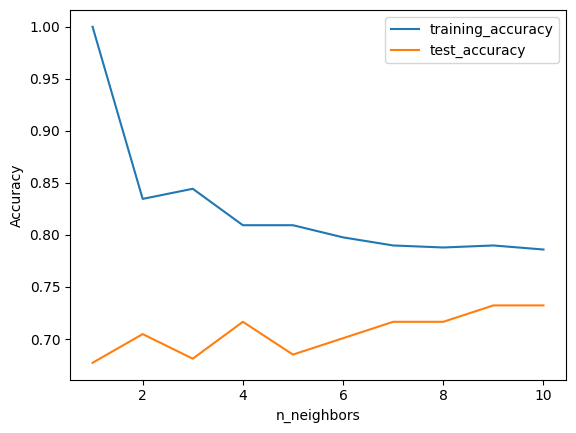

In [42]:
plt.plot(range(1,11), training_accuracy, label = "training_accuracy")
plt.plot(range(1,11), test_accuracy, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
print(knn.score(X_train, Y_train), ": Training accuracy")
print(knn.score(X_test, Y_test), ": Test accuracy")

0.7898832684824902 : Training accuracy
0.7322834645669292 : Test accuracy


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, Y_train)
print(dt.score(X_train, Y_train), ": Training accuracy")
print(dt.score(X_test, Y_test), ": Test accuracy")

1.0 : Training accuracy
0.6929133858267716 : Test accuracy


In [47]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=3)
dt1.fit(X_train, Y_train)
print(dt1.score(X_train, Y_train), ": Training accuracy")
print(dt1.score(X_test, Y_test), ": Test accuracy")

0.77431906614786 : Training accuracy
0.6929133858267716 : Test accuracy


In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, Y_train)
print(mlp.score(X_train, Y_train), ": Training accuracy")
print(mlp.score(X_test, Y_test), ": Test accuracy")

0.7645914396887159 : Training accuracy
0.7047244094488189 : Test accuracy


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [51]:
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train_scaled, Y_train)
print(mlp1.score(X_train_scaled, Y_train), ": Training accuracy")
print(mlp1.score(X_test_scaled, Y_test), ": Test accuracy")

0.8365758754863813 : Training accuracy
0.7283464566929134 : Test accuracy


C:\Users\siva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
